# tSNE of all the data coloured by metadata

Note that we use the data from the autoencoder/dimensionality reduction steps, not the raw data. This data already has been reduced and clustered, and so is much more appropriate than the raw data.

In [1]:
import os
import sys
from socket import gethostname

hostname = gethostname()

if hostname.startswith('hpc-node'):
    IN_DEEPTHOUGHT = True
    sys.path.append('..')
else:
    IN_DEEPTHOUGHT = False
from cf_analysis_lib.load_libraries import *
import cf_analysis_lib

sequence_type = "MGI"
datadir = '..'
sslevel = 'subsystems_norm_ss.tsv.gz'
taxa = "family"

df, metadata = cf_analysis_lib.read_the_data(sequence_type, datadir, sslevel='subsystems_norm_ss.tsv.gz', taxa="family")

In [32]:
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

In [2]:
df.head(3)

,"2,3-diacetamido-2,3-dideoxy-d-mannuronic acid",2-O-alpha-mannosyl-D-glycerate utilization,2-aminophenol Metabolism,2-ketoacid oxidoreductases disambiguation,2-oxoglutarate dehydrogenase,2-phosphoglycolate salvage,3-amino-5-hydroxybenzoic Acid Synthesis,4-hydroxybenzoyl-CoA reductase,5-methylaminomethyl-2-thiouridine,A Hypothetical Protein Related to Proline Metabolism,...,Pelagicoccaceae,Puniceicoccaceae,Chthoniobacteraceae,Terrimicrobiaceae,Limisphaeraceae,Akkermansiaceae,Rubritaleaceae,Verrucomicrobia subdivision 6,Verrucomicrobiaceae,Eremiobacteraceae
1068841_20180306_S,10.085904,2784.895948,516.160945,231.778018,122.573392,342.327431,783.041862,0.0,4136.703664,827.439614,...,0.000000,0.808564,0.0,0.0,0.0,22.370261,0.808564,0.0,3.234255,0.0
1447437_20171212_S,59.260325,1065.438272,543.947408,554.136026,428.171446,301.915763,679.310468,0.0,3913.676651,732.956657,...,1.271183,0.635592,0.0,0.0,0.0,36.864321,0.000000,0.0,3.177959,0.0
1128691_20171206_S,0.000000,426.619709,912.767750,49.606943,213.640568,277.798880,423.312580,0.0,2093.412992,236.459761,...,0.000000,10.749798,0.0,0.0,0.0,14.333065,0.000000,0.0,10.749798,0.0


In [3]:
metadata.head(3)

,minion,MGI,pwCF_ID,Sample date,IP vs OP,Hospital,Room,Age,Age groups,Paediatric vs Adult,...,Sum of meds,Sum of antifungals,Sum of steroid + mabs,DNA_extraction_ conc,SAGC ULN,DNA Conc. (ng/ul),Index I7,Index I5,Mean_Size_BP,Total Clusters Passing Filter (Million)
NAME,,,,,,,,,,,,,,,,,,,,,
1068841_20180306_S,1068841_20180306_S,1068841_20180306_S,1068841,2018-03-06,OP,RAH,Chest Clinic 7,47,7,Adult,...,0,0,0,1.070,SAGCFN_22_01754,42.8,CGCTCATT,ATAGAGGC,417,2.8
1085876_20180227_S,NaN,1085876_20180227_S,1085876,2018-02-27,OP,RAH,Chest Clinic 6,40,6,Adult,...,1,0,0,0.132,SAGCFN_22_01828,19.0,AGCGATAG,GGCTCTGA,674,2.5
1128691_20171206_S,NaN,1128691_20171206_S,1128691,2017-12-06,IP,RAH,RAH 8E 05,47,7,Adult,...,3,0,0,1.750,SAGCFN_22_01748,33.4,TCCGGAGA,GGCTCTGA,535,4.5


In [4]:
encoder_models = 'cluster_gbrfs'
if not os.path.exists(os.path.join(encoder_models, 'clusters.json')):
    print("Please run the autoencoder code before trying to load the models.", file=sys.stderr)
    exit(1)

if not os.path.exists(os.path.join(encoder_models, 'pc_df.tsv')):
    print("Please create and save the PCA before trying to load the models.", file=sys.stderr)
    exit(1)

with open(os.path.join(encoder_models, 'clusters.json'), 'r') as file:
    data = json.load(file)
tmpjsondf = pd.DataFrame(list(data.items()), columns=['Cluster', 'Feature'])
cluster_assignments = tmpjsondf.explode('Feature').reset_index(drop=True)
cluster_assignments['Cluster'] = cluster_assignments['Cluster'].astype(int)

pc_df = pd.read_csv(os.path.join(encoder_models, 'pc_df.tsv'), sep="\t", index_col=0)

In [8]:
#intcol = 'Pseudomonas Culture' # note these two columns have the same information, but 'CS_Pseudomonas aeruginosa' is a category, while 'Pseudomonas culture' is a float!
intcol = 'Sum of antibiotics'

intcol_title = replace_index.sub('', intcol).replace('_', ' ')
merged_df = pc_df.join(metadata[[intcol]]).dropna(subset=intcol)

categorical_data, custom_labels = cf_analysis_lib.create_custom_labels(metadata, intcol, merged_df)

X = merged_df.drop(intcol, axis=1)
y = merged_df[intcol]

In [14]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

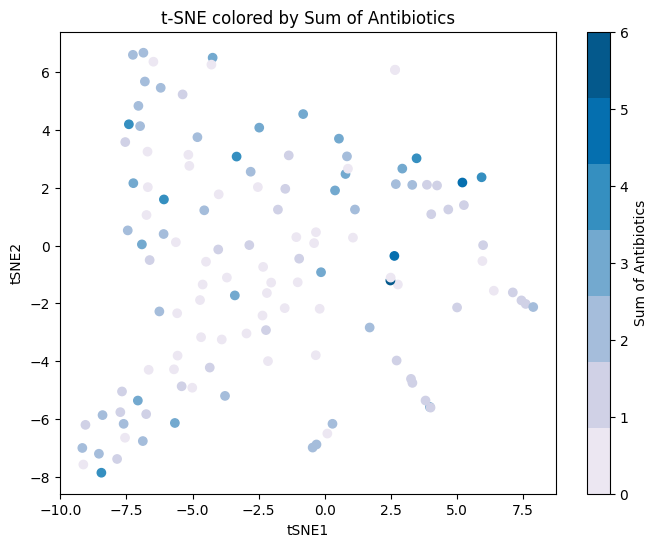

In [24]:
# Plot
plt.figure(figsize=(8,6))
cpalette = 'PuBu'
scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y, cmap=mcolors.ListedColormap(sns.color_palette(cpalette, len(y.unique()))))
plt.colorbar(scatter, label='Sum of Antibiotics')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('t-SNE colored by Sum of Antibiotics')
plt.show()

In [27]:
pc_df.index

Index(['1068841_20180306_S', '1447437_20171212_S', '1128691_20171206_S',
       '1128691_20171218_S', '1128691_20180116_S', '1162967_20180116_S',
       '1590009_20171212_S', '1282052_20180206_S', '1316935_20180417_S',
       '1651490_20171215_S',
       ...
       '825012_20181126_S', '848255_20190228_S', '875028_20180115_S',
       '877469_20190115_S', '892355_20180123_S', '895293_20180502_S',
       '896213_20180427_S', '913873_20180417_S', '980574_20180403_S',
       '983493_20180123_S'],
      dtype='object', length=127)

In [29]:
le = LabelEncoder()
encoded_labels = le.fit_transform(pc_df.index)

In [30]:
encoded_labels

array([  0,   9,   2,   3,   4,   5,  16,   6,   7,  21,   8,  10,  11,
        12,  13,  14,  17,  18,  19,  15,  20,  22,  23,  24,  25,   1,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  63,  36,  37,
        38,  40,  39,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126])

In [33]:
clf = LogisticRegression(multi_class='ovr', max_iter=1000)
clf.fit(tsne_results, encoded_labels)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [62]:
#prepare a mesh grid
h = 2  # step size
x_min, x_max = tsne_results[:, 0].min() - h, tsne_results[:, 0].max() + h
y_min, y_max = tsne_results[:, 1].min() - h, tsne_results[:, 1].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Predict across mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


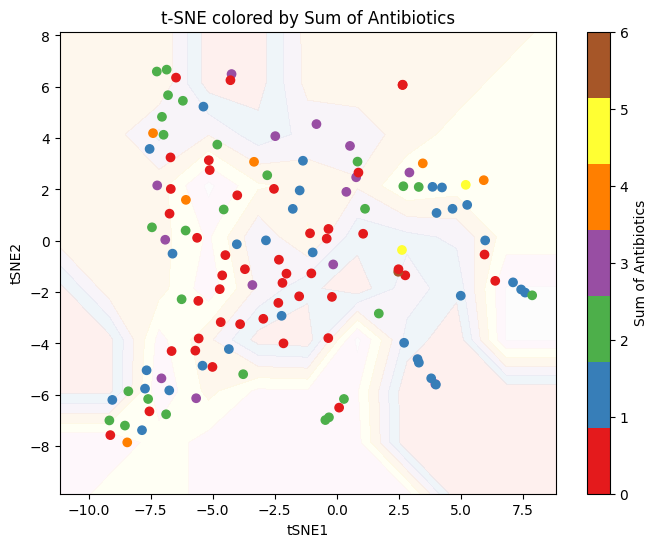

In [63]:
# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='Pastel1')

cpalette = 'Set1'
scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y, cmap=mcolors.ListedColormap(sns.color_palette(cpalette, len(y.unique()))))
plt.colorbar(scatter, label='Sum of Antibiotics')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('t-SNE colored by Sum of Antibiotics')
plt.show()